## Training CNN Model ##
#### Using only the heart beat with a moving frequency following HRV ####


### Load the Common Imports ###

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Input as Input
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D,Conv1D
from keras.models import Sequential
from keras.layers import Dropout
from keras import layers
from keras.layers import BatchNormalization
import h5py

print(keras.__version__)

2.4.3


# Load Mat Files


In [2]:
f = h5py.File('ML_genTrain_HRV_full_fs500_long_1.mat','r')
arrays = {}

for k, v in f.items():
    arrays[k] = np.array(v)

    
    


### Load the Dataset ###

In [3]:

datOut= arrays['datOut']
datLabels = arrays['fhActual']

tNum = datOut.shape[0]


maxFreq = 1


firstLayerLength = 1000 #Length of the Model input equivilent to window length, 
                        #Could be optimized (1second at fs = 500)
percentTrain = .9; #What percentange will be used to train (Reamining is test (10% test in this case))



trainEndEx = round(tNum*percentTrain) #Find out what index coresponds to 90% of the training data

x_train = np.zeros([trainEndEx*10,firstLayerLength])
y_train = np.zeros([trainEndEx*10,])
y_t_full= np.zeros([trainEndEx*10,firstLayerLength])
for k in range(0,10,1):
    x_train[k*trainEndEx:(k+1)*trainEndEx] = datOut[0:trainEndEx,k*firstLayerLength:(k+1)*firstLayerLength] #Add training phase data to seperate array
    y_t_full[k*trainEndEx:(k+1)*trainEndEx] = datLabels[0:trainEndEx,k*firstLayerLength:(k+1)*firstLayerLength]

    
#y_train = np.mean(y_t_full,axis=1) #Add training labels to vector

y_train = y_t_full[:,5]
    

#y_train = datLabels[0:trainEndEx,0:firstLayerLength] #Add training labels to vector
#y_train = np.mean(y_train,axis=1)

x_test = datOut[trainEndEx+1:,] #Add testing phase data to array
y_test = datLabels[trainEndEx+1:]/maxFreq #Add testting labels to vector


y_test_scoreOnly = np.mean(y_test,axis=1)
x_test_scoreOnly = x_test[:,0:firstLayerLength]

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


print('x_test shape: ',x_test.shape)
print('x_train shape: ',x_train.shape)

print('y_test shape: ',y_test.shape)
print('y_train shape: ',y_train.shape)




print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')




x_test shape:  (999, 25001)
x_train shape:  (90000, 1000)
y_test shape:  (999, 25001)
y_train shape:  (90000,)
90000 train samples
999 test samples


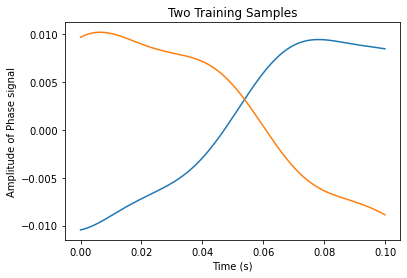

1.048791569999306


In [4]:
x = 50000
t = np.arange(0,1,1/10000)
t = t[0:firstLayerLength]

plt.plot(t,x_train[x,:],t,x_train[1,:]) #Plot two training sample at random to verify output
plt.ylabel('Amplitude of Phase signal')
plt.xlabel('Time (s)')
plt.title('Two Training Samples')
plt.show()
print(y_train[x])

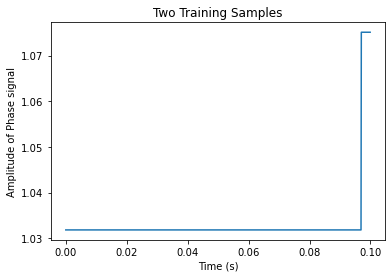

1.0318126552452922
1.0331111165018747
1.0318126552452922


In [5]:
x = 207
t = np.arange(0,1,1/10000)
t = t[0:firstLayerLength]

plt.plot(t,y_t_full[x,:]) #Plot two training sample at random to verify output
plt.ylabel('Amplitude of Phase signal')
plt.xlabel('Time (s)')
plt.title('Two Training Samples')
plt.show()
print(y_train[x])
print(np.mean(y_t_full[x,:]))
print(y_t_full[x,1])

# Set up Model


In [6]:
#Create model in spec to the prior research

model = Sequential()
model.add(Input(shape=(firstLayerLength, )))

model.add(Dense(2,input_shape  = (firstLayerLength,)))
model.add(Dense(2))
model.add(Dense(3))
model.add(Dense(1))

In [7]:

#set up optimizer and set the metric to MSE
model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Nadam(learning_rate=0.001)
,
                  metrics=[keras.metrics.MeanSquaredError()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 2002      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


### Convert class vectors to binary class matrices ###

This is the one to use with the `categorical_crossentropy` loss.

In [8]:
batch_size = 100  # Set the batch size
epochs = 20 # Set the number of epochs

print(model.inputs[0].dtype)


<dtype: 'float32'>


### Train the Model ###

In [9]:
# One Hidden Layer
initializer = keras.initializers.RandomNormal(mean=0., stddev=5.)


hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.33,
          callbacks=None)

Epoch 1/20
603/603 [==============================] - 5s 7ms/step - loss: 0.5949 - mean_squared_error: 0.5949 - val_loss: 0.1128 - val_mean_squared_error: 0.1128
Epoch 2/20
603/603 [==============================] - 3s 5ms/step - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 3/20
603/603 [==============================] - 4s 7ms/step - loss: 0.0662 - mean_squared_error: 0.0662 - val_loss: 0.1140 - val_mean_squared_error: 0.1140
Epoch 4/20
603/603 [==============================] - 3s 5ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.1139 - val_mean_squared_error: 0.1139
Epoch 5/20
603/603 [==============================] - 3s 5ms/step - loss: 0.0659 - mean_squared_error: 0.0659 - val_loss: 0.1138 - val_mean_squared_error: 0.1138
Epoch 6/20
603/603 [==============================] - 3s 4ms/step - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.1142 - val_mean_squared_error: 0.1142
Epoch 7/20
603/603 [========

In [10]:
score = model.evaluate(x_test_scoreOnly, y_test_scoreOnly, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08841180801391602
Test accuracy: 0.08841180801391602


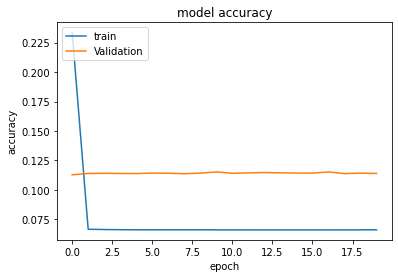

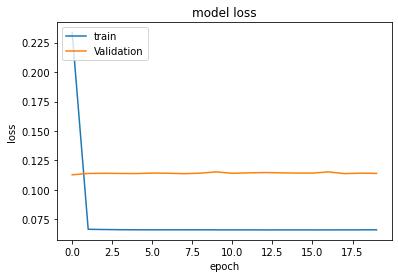

In [11]:
plt.plot(hist.history['mean_squared_error'])
plt.plot(hist.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','Validation'], loc='upper left')
plt.show()


In [12]:
fEst = np.zeros(y_test.shape) 


for k in range(0,x_test.shape[1] - firstLayerLength,100):
    ttemp = model.predict(x_test[:,k:k+firstLayerLength])
    fEst[:,k:k+firstLayerLength] =ttemp
    




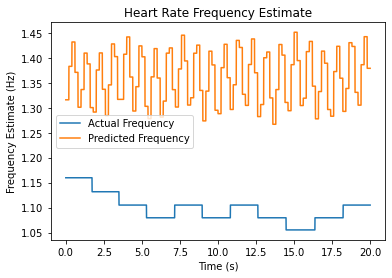

In [13]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,y_test[0,x:x+numShow], t, fEst[0,x:x+numShow])
plt.ylabel('Frequency Estimate (Hz)')
plt.xlabel('Time (s)')
plt.legend(['Actual Frequency','Predicted Frequency'])
plt.title('Heart Rate Frequency Estimate')
plt.show()


In [14]:
print(y_test.shape)

(999, 25001)


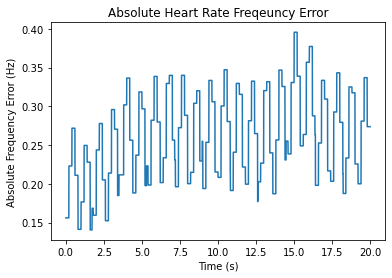

In [15]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,np.abs(y_test[0,x:x+numShow] - fEst[0,x:x+numShow]))
plt.ylabel('Absolute Frequency Error (Hz)')
plt.xlabel('Time (s)')
plt.title('Absolute Heart Rate Freqeuncy Error')
plt.show()

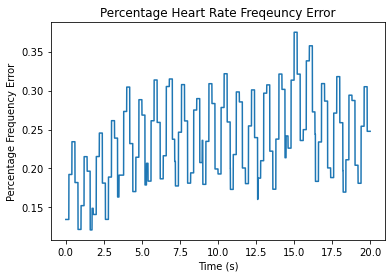

In [16]:
x = 0
Ts = 1/10000
numShow = 10000
t = arrays['t']
t = t[x:x+numShow]
plt.plot(t,np.abs(y_test[0,x:x+numShow] -fEst[0,x:x+numShow])/y_test[0,x:x+numShow])
plt.ylabel('Percentage Frequency Error')
plt.xlabel('Time (s)')
plt.title('Percentage Heart Rate Freqeuncy Error')
plt.show()